In [1]:
%matplotlib inline

# A programming activity with reddit!

## Introduction

In today's activity, we will:

1. Create a reddit account (if you don't have one already)
2. Create an app for that reddit account
3. Scrape some reddit data
4. Do some simple text analysis of that data
5. Create a machine learning classifier for that data

We're going to be doing all of that in a [Jupyter notebook](http://jupyter.org/), which we launched "in the cloud" (really, via the use of the [My Binder](https://mybinder.org/) tool, designed by folks at U.C. Berkeley.

What is a Jupyter Notebook? Simply put, its a way to organize code and analyses in one place.  So you can, for example:
- write up some text with <b>HTML Tags</b>, or
- include links to [your favorite blogs](http://www.buffalorumblings.com/), or 
- put in some fancy math that doesn't really mean anything to you (me), or
$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$
- even put images in of your pet!
<img width="200px" src="https://kennyjoseph.github.io/papers/strong.jpg"></img>

What we'll do in this notebook is walk through each step of our analyses, where you can run and edit the code as you wish. Note that you can also run and edit this very text if you'd like!  To do so, just double click the text. It will open up an editable text box. When you're done, you can press ```SHIFT+ENTER```, and your changes will be committed!

## Trying to edit some text

Give editing a text box a go! Change this text to whatever you want it to say!!

## Step 1: Creating a reddit account

If you don't have one already, the first thing you'll need to do is go to [reddit](http://www.reddit.com/) and create a reddit account.

## Step 2: Creating a reddit app

Now, we're going to create a reddit app. Make sure you're signed in to your reddit account, and then go to the [app page](https://ssl.reddit.com/prefs/apps/).  From here, click on the "create an app" button. <b>Make sure that you've selected the "script" option in the checkbox</b>, and then fill in a name and description. For the two URL fields, it doesn't really matter what you put. Your input should look something like mine.

<img width="1000px" src="reddit_tut_0.png" style="max-width:95%;border:3px solid black;"></img>
    
Cool! Now hit "create app" button.

## Step 3: Scraping some reddit data

### 3a - setting up your API credentials
We're now going to pull down some real, live reddit posts and take a look at them! To do so, we're going to need some information from our app.  Reddit uses this information to keep track of who is accessing their data, and in what ways they're accessing it.  In other words, reddit wants to make sure it knows who might be doing bad things with their data or to their platform, so they can shut those apps down. We'll return to that point in a bit.  But, for now, you'll need to edit the code below to enter in your ```client_id```, your ```client_secret```, and your ```username```  in order for you to be able to collect data.  ***Note - because you're going to enter your client secret here, please make sure to delete this app after class (you can always just create a new one)! While its unlikely that anyone would be able to access it from this script, better to be safe than sorry***. You can find the first two on the app creation page, where the red boxes are in the image below:

<img width="1000px" src="reddit_tut_1.png" style="max-width:95%;border:3px solid black;"></img>

Enter your information between the appropriate quotation marks in the (python) code below, replacing the phrase ```ENTER_YOUR_XXX_HERE```.

 ***Make sure to push ```SHIFT+ENTER``` after you've changed the code!*** 

In [2]:
your_client_id = 'FBqfsrdgbU3Mpw'
your_client_secret = 'uDsgEmD6TWNXXGVTgdG8ODjUFhw'
your_username = "ENTER_YOUR_USERNAME_HERE"

### 3b - Selecting a subreddit

Ok, we're almost all set up to scrape! to do so, we're going to use a python library called [praw](https://praw.readthedocs.io/).  Praw is a relatively powerful tool, allowing you to do a bunch of cool things with the reddit API.  Today, we're just going to do the basics.  We're first going to pull down a bunch of submissions from a bunch of different subreddits, defined in the variable ```subreddit_of_interest``` below.  If you have another favorite subreddit or two, feel free to add it by adding a ```+``` and then the subreddit name to this variable.

*Be careful, though. The subreddits I picked out have been tested for this analysis and work OK because they're mostly based on text, and we're going to do text analysis. If you try a different one, make sure it isn't totally image based, or you're going to have less fun/weaker results.*



***Regardless, i.e. even if you want to work with the subreddits here make sure to push ```SHIFT+ENTER``` on the code block below!***

In [7]:
subreddits = ["Jokes","news",
                         "science","WritingPrompts","ShowerThoughts",
                         "worldnews","todayilearned","learnprogramming"]

### 3c - Setting up our authentication mechanism for our application

The last step before we start crawling is to set ourselves up to make authenticated calls to the reddit API. In class, we spent a few minutes talking about how this process works for one specific authentication mechanism, OAuth2.  Here, because we're just using a script for personal use, reddit actually makes it even easier; we just pass some information along in our HTTP request. The ```praw``` library makes this relatively easy, so we'll just use it. For more details on this authentication process, though, you can go [here](https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example).

In [8]:
# This is a comment in the code. All comments in python are preceeded by a pound sign
# Comments can be plain English, because the computer ignores them when running the code.
# The line of code below this comment imports code written by other people in the form of the 
# praw library
import praw

import warnings
warnings.filterwarnings('ignore')


# This line of code calls a function in the praw library.
# That function (or block of code, which is hidden in the praw library's code)
# sets us up to easily make calls to the reddit API moving forward, without
# having to enter this information every time we make a call
reddit = praw.Reddit(client_id=your_client_id,
                     client_secret=your_client_secret,
                     user_agent=your_username + ": my first scraper")

### 3d - Finally, some scraping!

Alright, now we can finally pull some data down from the reddit API!

We're going to pull down the top 1024 posts of all time from our subreddits of choice in the code below

In [9]:
### TODO: REPLACE

# create a list of submissions and load using a progress bar
submissions = []
n_submissions_to_get = 1000


for sr in subreddits:
    subreddit = reddit.subreddit(sr)

    print("You're pulling down posts from: ",subreddit.display_name)

    # populate that list 
    for submission in subreddit.top(time_filter="all",limit=n_submissions_to_get):
        submissions.append(submission)

    print(len(submissions))

You're pulling down posts from:  Jokes
997
You're pulling down posts from:  news
1991
You're pulling down posts from:  science
2982
You're pulling down posts from:  WritingPrompts
3982
You're pulling down posts from:  ShowerThoughts
4944
You're pulling down posts from:  worldnews
5938
You're pulling down posts from:  todayilearned
6920
You're pulling down posts from:  learnprogramming
7916


### 3e : Checking out some individual posts

Cool! We've now got a bunch of submissions to look at! Let's check out some details about the first one!  After you've run the code below, then change the variable ```submission_index_we_want_to_look_at``` to a different number (less than the overall number of submissions we have, though!) to check out other posts!

In [10]:
# a library for nice formatting of times
import arrow

submission_index_we_want_to_look_at = 0

if submission_index_we_want_to_look_at > (len(submissions)-1):
    print("The index you chose is bigger than the number of submissions we have, so",
           "I'm just showing you the first one!")
    submission_index_we_want_to_look_at = 0
    
sub = submissions[submission_index_we_want_to_look_at]

description_str = """
Post Subreddit: {}
\n******\nPost Title (if jokes, the setup):\n******\n {}
\n******\nPost Description (if jokes, the punchline):\n******\n {}
\n******\nWhen posted:\n******\n {}
\n******\nNumber of upvotes:\n******\n {}
\n******\nNumber of downvotes:\n******\n {}
\n******\nTotal Score:\n******\n {}
\n******\nLink to Submission:\n******\n {}
"""
print(description_str.format(
    sub.subreddit.display_name,
    sub.title,
    sub.selftext,
    arrow.get(sub.created_utc).humanize(), 
    sub.ups, 
    sub.downs,
    sub.score,
    sub.shortlink))


Post Subreddit: Jokes

******
Post Title (if jokes, the setup):
******
 Sad News: The founder of /r/jokes has passed away

******
Post Description (if jokes, the punchline):
******
 RIP Larry Tesler, the UI designer that created Cut, Copy and Paste, died age 74

******
When posted:
******
 2 years ago

******
Number of upvotes:
******
 148689

******
Number of downvotes:
******
 0

******
Total Score:
******
 148689

******
Link to Submission:
******
 https://redd.it/f6lii3



### What the heck is going on? How'd we do that?

We were able to pull down the data because we accessed reddit's REST API.  If you want to learn more about how that worked, you can check out [this article](https://www.smashingmagazine.com/2018/01/understanding-using-rest-api/), which does a pretty good job at explaining REST APIs


## Step 4: A "Data Science" Analysis


### 4a : Finding the popular subreddit(s)
OK! On to the data. We're going to first ask a simple question: ***Which subreddit has the most popular posts?***

To answer that question, however, we can look at the data in a lot of different ways. We're going to explore a few of them here!

To do that, we're first going to load in a few python tools that will help us. We're then going to format our data in a ***dataframe***. In python, as well as in a number of other programming languages, the idea of a data frame is becoming increasingly common when performing analyses.  For a tutorial on what a dataframe is, see [here](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python).

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="white", palette="muted", color_codes=True)

# get the scores for all the submissions we have
reddit_dataframe = pd.DataFrame([(s.subreddit.display_name,s.score) for s in submissions], columns=['subreddit','score'])

One thing we might first think to do is to just look at the total score for all posts we collected from the different subreddits:

In [12]:
print(reddit_dataframe.groupby("subreddit").score.sum().sort_values(ascending=False))

subreddit
worldnews           89893210
todayilearned       86394436
news                84836919
Showerthoughts      70028776
science             55719879
Jokes               40973110
WritingPrompts      12715900
learnprogramming     1809531
Name: score, dtype: int64


Which subreddit had the highest score? Which had the lowest?

Regardless, there's a problem with this analysis - the API doesn't always give us back as many posts as we asked for! There's a few reasons for that, which we won't get into, but we can see this is true by counting the number of submissions that we have below:

In [13]:
print(reddit_dataframe.groupby("subreddit").count().sort_values('score',ascending=False))

                  score
subreddit              
WritingPrompts     1000
Jokes               997
learnprogramming    996
news                994
worldnews           994
science             991
todayilearned       982
Showerthoughts      962


So, we really should be looking on a *per post* basis.  This means we are going to summarize the posts by a single number (notice that "total posts" and "post count" are also statistics).  What number should we choose? Discuss this as a class...


... you might have thought of another option, but we'll look at two here. The first is the *median*, the second is the *mean*.  In class, your professor will now go over the mean and the median.  Below, we show the mean and medians for the top posts for each subreddit

In [14]:
print(reddit_dataframe.groupby("subreddit").mean().sort_values('score',ascending=False))

                         score
subreddit                     
worldnews         90435.824950
todayilearned     87978.040733
news              85349.013078
Showerthoughts    72794.985447
science           56225.912210
Jokes             41096.399198
WritingPrompts    12715.900000
learnprogramming   1816.798193


In [15]:
print(reddit_dataframe.groupby("subreddit").median().sort_values('score',ascending=False))

                    score
subreddit                
worldnews         84798.0
todayilearned     82857.5
news              77940.0
Showerthoughts    68054.5
science           52267.0
Jokes             37728.0
WritingPrompts    11410.5
learnprogramming   1491.0


Were there any changes here? If so, what were they? 

#### Looking at the distribution of scores

These statistics are interesting and help us to understand the most popular subreddits, but they a) aren't very pretty and, more importantly, b) don't necessarily capture all the details about the ***distribution*** of the data.

Why might we care about a) and b) in the real world? Discuss this as a class.

To address these issues, we'll visualize the distribution of the scores for these top posts (using the [seaborn](https://seaborn.pydata.org/) library).  We'll visualize the data using a [box-and-whisker plot](https://www.statcan.gc.ca/edu/power-pouvoir/ch12/5214889-eng.htm), which makes it easier to compare the distributions to each other.

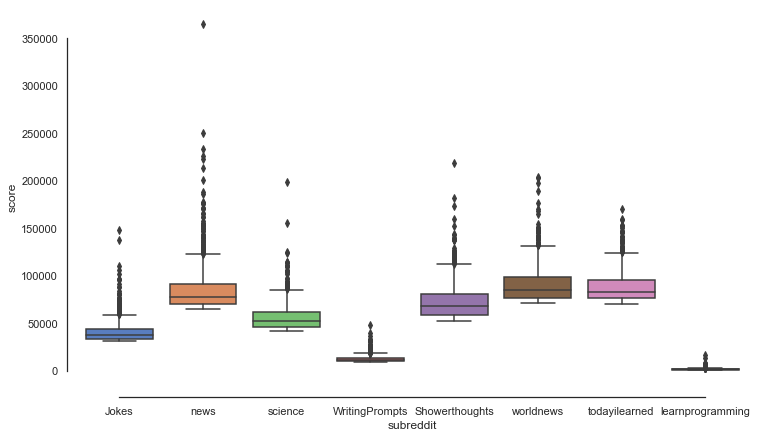

In [16]:
# Box-and-whisker
f, axes = plt.subplots(1,1, figsize=(12, 7), sharex=True)
sns.boxplot(x="subreddit", y="score",data=reddit_dataframe)
sns.despine(offset=10, trim=True)
plt.savefig("upvote_distribution.png")


Using the box-and-whisker plot, answer the following questions:

- Were there more outliers above or below the median?
- Which subreddits overlapped with the upper quartile of the science subreddit?


### 4c: Looking at some common words

So we've now seen that the distribution of scores is "heavy-tailed", even among the top posts of all-time (imagine what it looks like over all posts, ever)!  

But what else can we say about the differences between subreddits? We're first going to try to understand that by looking at the most common words and phrases in the top posts across the different subreddits

To do that, we're going to need to analyze the text of the posts. There are many, many libraries available for text analysis, and as we talked about a bit in class, many, many different ways to analyze and process text.  Today, we're just going to do the simplest possible thing!  We're going to:

1. Take all the text from each post
2. Tokenize the text into *unigrams* - or single word tokens
3. Count the number of times each unigram appears in any joke
4. Visualize those counts!

To do our text analysis, we're going to make use of the [nltk](https://www.nltk.org/) library, one of the more popular python libraries for basic text processing.

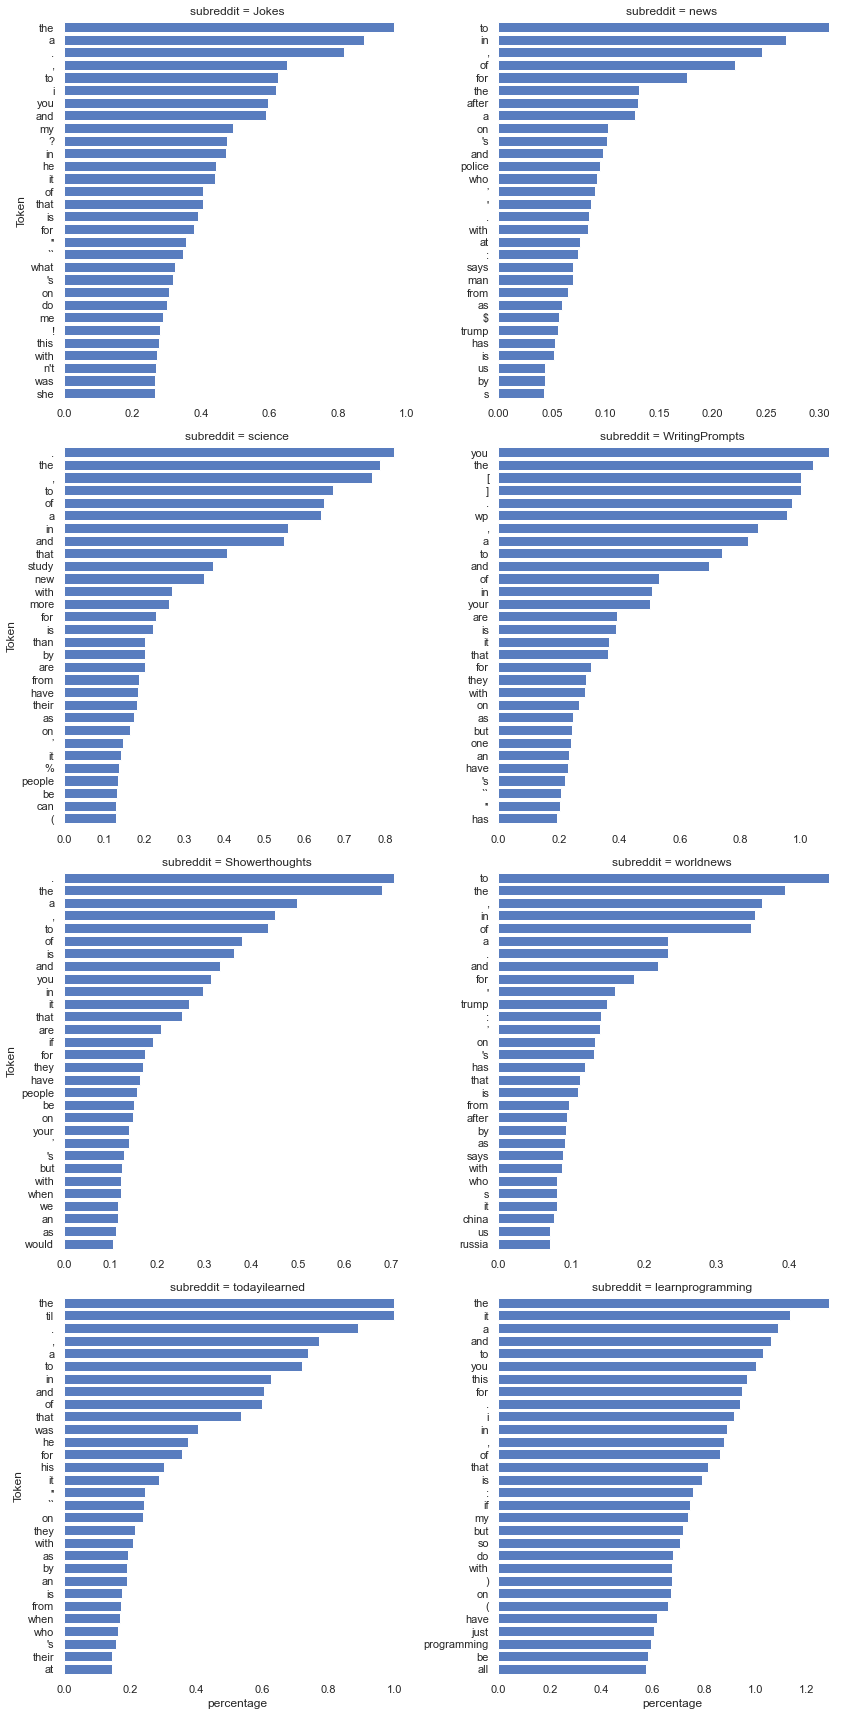

<Figure size 432x288 with 0 Axes>

In [17]:
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

data_to_vis = pd.DataFrame()
# for each subreddit
for subreddit in reddit_dataframe.subreddit.unique():
    # Step 1: put all the text from each post into a single object (a single "string")
    submission_strings = [s.title + s.selftext for s in submissions if s.subreddit.display_name == subreddit]

    # Step 2: tokenize, counting each token only once
    tokenized_submissions = [set(word_tokenize(s)) for s in submission_strings]

    # Step 3: 
    # aggregate tokens from all posts into a single list
    all_tokens = [token.lower() for tokenized in tokenized_submissions for token in tokenized ]
    # and count them up
    all_tokens_counted = Counter(all_tokens)
    subreddit_df = pd.DataFrame(all_tokens_counted.most_common(30), columns=['Token','Count'])
    subreddit_df['subreddit'] = subreddit
    data_to_vis = data_to_vis.append(subreddit_df)
    
# Step 4: Visualize - check out the top 30 terms, by percentage of posts they were in
# determine percent!
data_to_vis = data_to_vis.merge(reddit_dataframe.groupby("subreddit").count().reset_index())
data_to_vis['percentage'] = data_to_vis.Count / data_to_vis.score
# Plot

g = sns.FacetGrid(data_to_vis, col="subreddit", col_wrap=2, height=6,sharex=False,sharey=False)
g.map(sns.barplot,'percentage','Token')
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig("initial_word_distro.pdf")

Well that's pretty uninteresting, isn't it! What happened? Basically, we found that all of the popular posts have super common words in them, and some punctuation.  So, this time, lets do the same thing, but get rid of common words, or **stopwords**, as well as punctuation

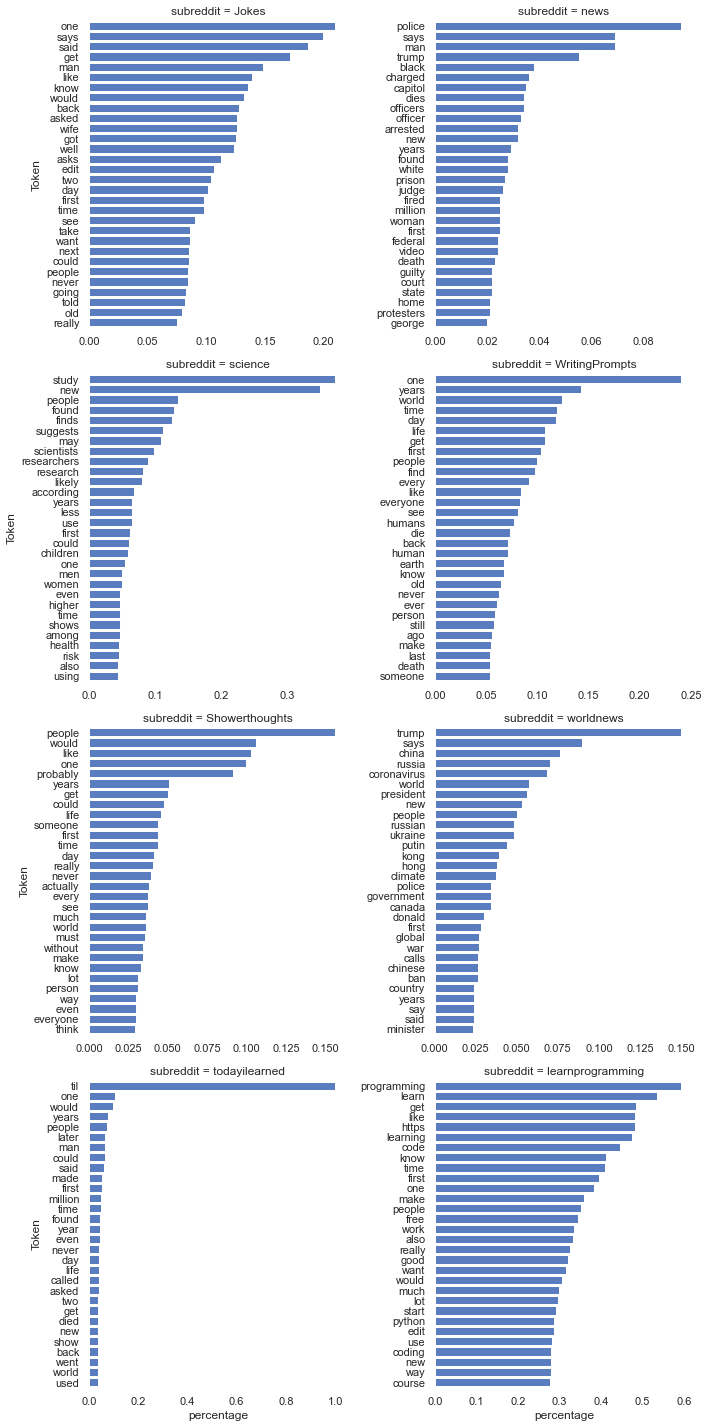

<Figure size 432x288 with 0 Axes>

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

data_to_vis = pd.DataFrame()
# for each subreddit
for subreddit in reddit_dataframe.subreddit.unique():
    # Step 1: put all the text from each post into a single object (a single "string")
    submission_strings = [s.title + s.selftext for s in submissions if s.subreddit.display_name == subreddit]

    # Step 2: tokenize, counting each token only once
    tokenized_submissions = [set(word_tokenize(s)) for s in submission_strings]

    # Step 3, again: 
    # aggregate tokens from all posts into a single list
    all_tokens = [token.lower() for tokenized in tokenized_submissions for token in tokenized ]
    # now - get rid of boring tokens (non-words, short words, and non-stopwords)
    all_tokens = [token for token in all_tokens if token.isalnum() and token not in stop_words and len(token) >= 3 ]
    # and count them up
    all_tokens_counted = Counter(all_tokens)

    subreddit_df = pd.DataFrame(all_tokens_counted.most_common(30), columns=['Token','Count'])
    subreddit_df['subreddit'] = subreddit
    data_to_vis = data_to_vis.append(subreddit_df)
    
# Step 4: Visualize - check out the top 30 terms, by percentage of posts they were in
# determine percent!
data_to_vis = data_to_vis.merge(reddit_dataframe.groupby("subreddit").count().reset_index())
data_to_vis['percentage'] = data_to_vis.Count / data_to_vis.score
# Plot

g = sns.FacetGrid(data_to_vis, col="subreddit", col_wrap=2, height=5,sharex=False,sharey=False)
g.map(sns.barplot,'percentage','Token')
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig("initial_word_distro_cleaned.pdf")


What can we learn from this, if anything? Discuss as a class!

## Step 5: A "Machine Learning" Analysis - Can we predict the subreddit?

Alright, let's move on to another interesting question - can we actually predict the subreddit of a post just from its content? We might build a rule-based model to answer that - if the post title says something about Trump, then its news- but as we saw in lecture, rule-based approaches can get tricky and have no guarantees of working well. Instead, we're going to build a machine learning model that learns these kinds of patterns from the data to perform the classification task.

We're going to build a simple machine learning model. Recall that in machine learning, at a basic level, we need:

1. something to predict, 
2. some "features" that we can use to make those predictions and 
3. a model that we can use to map features to the values we're trying to predict.  

Here, we're going to:
1. **predict which subreddit the post came from** from
2. **the words within the post title and self-text** using
3. a [regularized logistic regression model](https://www.coursera.org/lecture/machine-learning/regularized-logistic-regression-4BHEy)

We're going to train our model on some of our data, and then test it on a separate part that the model doesn't get to see. We'll then repeat that a bunch of times - in other words, we'll be using [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). We'll look at how well the model does at classifying each subreddit. 

We're also going to look at the output of the model. Specifically, we're going to look at what words the model identifies as being **most likely to be predictive of a higher score**.

Note that we're not going to talk in any detail about the model, that will be for later courses. But, if you're interested in what its doing, feel free to watch the Coursera video, or come talk to Prof. Joseph during office hours!

The code for this analysis is below; if you'd like to learn more about how this code (as opposed to the model) works, it is largely drawn from [this tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

count_vect = CountVectorizer(stop_words='english', min_df =.001)
X_counts = count_vect.fit_transform([s.title + s.selftext for s in submissions])

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_counts)
y = np.array([1 if s.subreddit.display_name in {"news",'worldnews','science'} else 0 for s in submissions ])

skf = StratifiedKFold(n_splits=3)
fold = 0

test_res = []
model_pred_test = []
for train_index, test_index in skf.split(X, y):
    fold +=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegressionCV()
    fitted = model.fit(X_train, y_train)
    test_res += list(y_test)
    model_pred_test +=  list(model.predict(X_test))

print(classification_report(test_res, model_pred_test, target_names=['Not News','News']))

The table above gives the results for our model; but what do these results mean?  First, note we have three rows in the table - one for our classification results for the "Not News" reddits, one for the "News" reddits, and one for the overall results.  Each row has four numbers, which give details on our results.

For now, we'll ignore the F1-score and concentrate on precision, recall and support. Support is simply the number of data points we're classifying.  The chart below, from Wikipedia, gives an explanation of precision and recall; you can also talk further about it in class.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png"></img>

So our results seem pretty good, but compared to what? Since we're not going to compare to other models today, what about comparing to just randomly guessing? Lets check that out:


In [ ]:
print(classification_report(y_test,  
                            np.random.choice([0, 1], 
                                             size=(len(y_test),), 
                                             p=[y.sum()/len(y), 1-(y.sum()/len(y))]), 
                            target_names=['Not News','News']))



One last question - how do we have any idea of what our model is doing?  Well, one way to check - look at the words its using to most clearly identify what is vs. what isn't news!

In [ ]:
model = LogisticRegressionCV()
fitted = model.fit(X, y)
coefficient_data = pd.DataFrame(list(zip(list(count_vect.vocabulary_.keys()),model.coef_[0,:])), 
                        columns=['word','coef'])

top_positive = coefficient_data.sort_values("coef",ascending=False)[:50].word
top_negative = coefficient_data.sort_values("coef",ascending=True)[:50].word

print("""Top 50 words predicting a post is to one of the news subreddits:\n\n{}

Top 50 words predicting a post is to one of the other subreddits: \n\n{}
""".format(", ".join(top_positive), ", ".join(top_negative)))


## Step 6 (bonus step!): Discussion and another (fancier) analysis of reddit data

Today, we did a whirlwind tour of scraping some data, inspecting that data, and then building a machine learning classifier to make predictions about whether or not a post was from a news subreddit.

Note that there are so many other things we could have chosen to do with this data! For example, check out [this](https://explosion.ai/demos/sense2vec) demo of how we might have used (a lot more) reddit data to find words and phrases that are similar to each other!

More importantly, because we did everything fairly quickly, and took some shortcuts, our analysis is **flawed in many important ways**.  For example, our analysis only includes posts that were *already highly popular*, meaning that we could be totally missing things that differentiate posts that are not popular at all from ones that are even kind of popular.  Also - we only tried one kind of model and feature combination!

We also didn't show at all how to use the API to **post content**, which we could also do! See the [praw](https://praw.readthedocs.io/en/latest/tutorials/reply_bot.html) documentation for code and a tutorial on how to do that!

All that, for a different day.

In the meantime, with the remaining time in class, discuss some other potential ways in which our analysis is flawed, and how those flaws could be corrected.  Then, discuss some potential expansions on our analysis. What else could be done with this data? What could we learn?  Hopefully, you have some great ideas now!